In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from scipy import stats
from scipy import stats as st

In [3]:
missing_value=[np.nan]
df=pd.read_csv("train.csv",na_values=missing_value)

In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


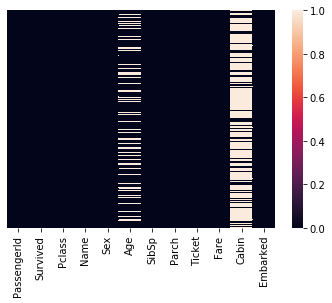

In [5]:
sns.heatmap(df.isnull(),yticklabels=False)

In [6]:
df=df.dropna(how='all')

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [8]:
df.Age=df.Age.interpolate()

In [9]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.5,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
df.drop('Cabin',axis=1,inplace=True)

In [12]:
df.drop('PassengerId',axis=1,inplace=True)

In [13]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.5,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
import matplotlib.pyplot as plt

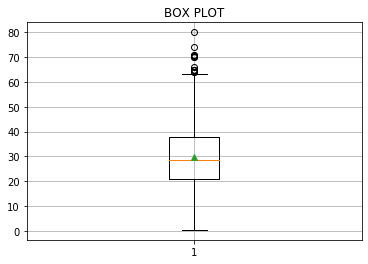

In [15]:
plt.boxplot(df.Age,showmeans=True)
plt.title("BOX PLOT")
plt.grid(True)
plt.show()

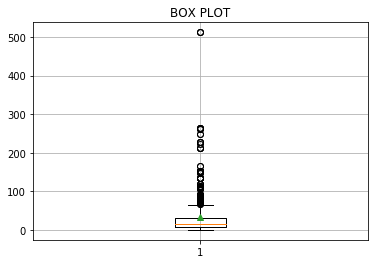

In [16]:
plt.boxplot(df.Fare,showmeans=True)
plt.title("BOX PLOT")
plt.grid(True)
plt.show()

In [17]:
IQR = df["Age"].quantile(0.75) - df["Age"].quantile(0.25) # interquartile range

In [18]:
outliers = df[df["Age"] > df["Age"].quantile(0.75) + 1.5*IQR]

In [19]:
usual = df.drop(outliers.index)

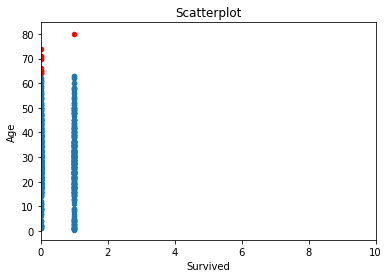

In [20]:
ax = usual.plot(x="Survived", y="Age", kind="scatter")
outliers.plot(x="Survived", y="Age", kind="scatter", c="red", ax=ax)
ax.set_title("Scatterplot")
ax.set_ylabel("Age")
ax.set_xlim([0,10]);

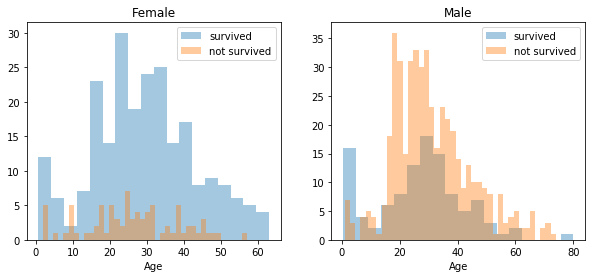

In [21]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

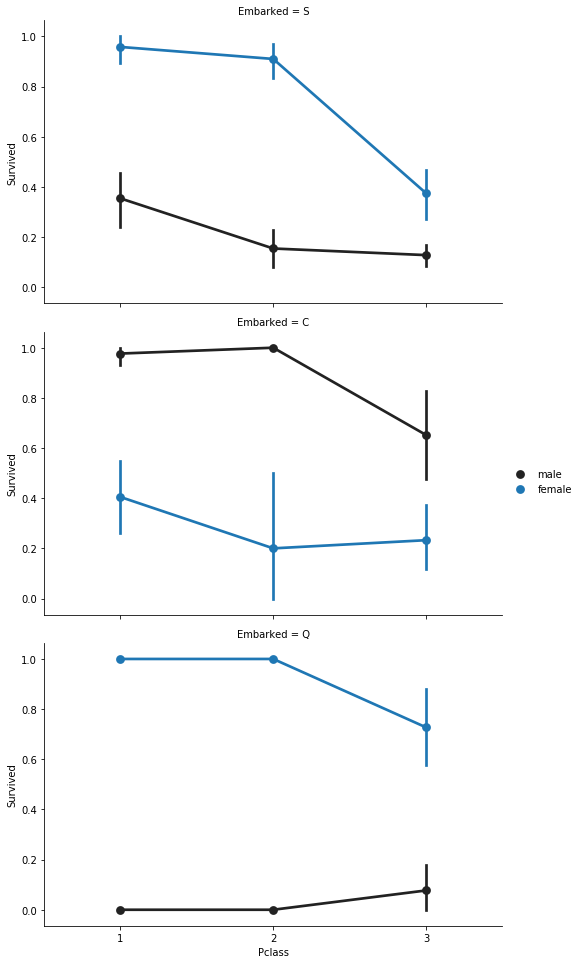

In [22]:
FacetGrid = sns.FacetGrid(df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

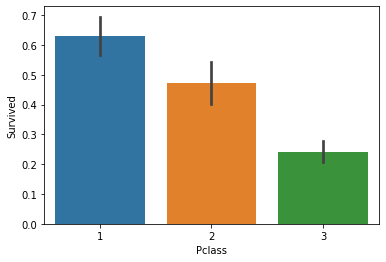

In [23]:
sns.barplot(x='Pclass', y='Survived', data=df)

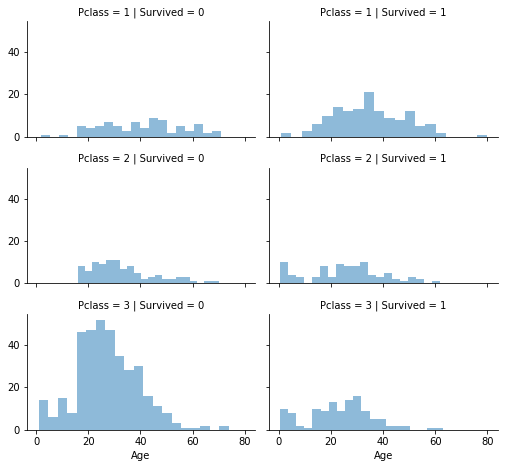

In [24]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [25]:
mean_fare = df['Fare'].mean()
print(mean_fare)

32.2042079685746


In [26]:
mean_Survived = df['Survived'].mean()
print(mean_Survived)

0.3838383838383838


In [27]:
mean_age = df['Age'].mean()
print(mean_age)

29.726060606060603


In [28]:
mean_Pclass = df['Pclass'].mean()
print(mean_Pclass)

2.308641975308642


In [29]:
#Variance of the data
df.var()

Survived       0.236772
Pclass         0.699015
Age          193.275428
SibSp          1.216043
Parch          0.649728
Fare        2469.436846
dtype: float64

Text(0, 0.5, 'Frequency')

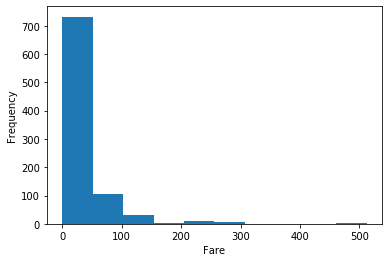

In [30]:
#Graph before Normalization (Check whether the data is normal)
df['Fare'].plot.hist()
plt.xlabel('Fare')
plt.ylabel("Frequency")

In [31]:
#normalization
# Create x_fare, where x_fare the 'scores' column's values as floats
x_fare = df[['Fare']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled_fare = min_max_scaler.fit_transform(x_fare)

# Run the normalizer on the dataframe
df_normalized_fare = pd.DataFrame(x_scaled_fare)

In [32]:
df_normalized_fare

,0
0,0.014151
1,0.139136
2,0.015469
3,0.103644
4,0.015713
...,...
886,0.025374
887,0.058556
888,0.045771
889,0.058556


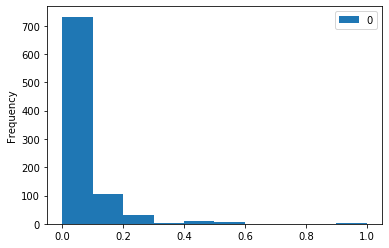

In [33]:
#Normalized graph
df_normalized_fare.plot.hist()

Text(0, 0.5, 'Frequency')

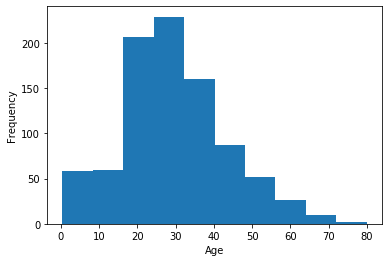

In [34]:
#Graph before Normalization (Check whether the data is normal)
df['Age'].plot.hist()
plt.xlabel('Age')
plt.ylabel("Frequency")

In [35]:
#normalization
# Create x_age, where x-age the 'scores' column's values as floats
x_age = df[['Age']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler_age = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled_age = min_max_scaler_age.fit_transform(x_age)

# Run the normalizer on the dataframe
df_normalized_age = pd.DataFrame(x_scaled_age)

In [36]:
df_normalized_age

,0
0,0.271174
1,0.472229
2,0.321438
3,0.434531
4,0.434531
...,...
886,0.334004
887,0.233476
888,0.277457
889,0.321438


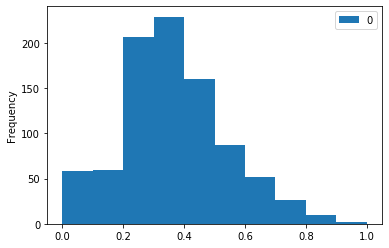

In [37]:
#Normalized graph
df_normalized_age.plot.hist()

Text(0, 0.5, 'Frequency')

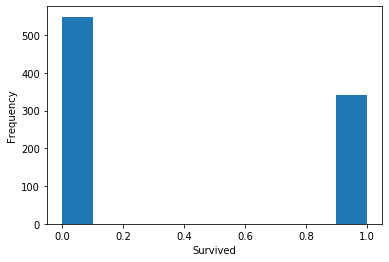

In [38]:
#Graph before Normalization (Check whether the data is normal)
df['Survived'].plot.hist()
plt.xlabel('Survived')
plt.ylabel("Frequency")

In [39]:
#normalization
# Create x_survived, where x_survived the 'scores' column's values as floats
x_survived = df[['Survived']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler_survived = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled_survived = min_max_scaler_survived.fit_transform(x_survived)

# Run the normalizer on the dataframe
df_normalized_survived = pd.DataFrame(x_scaled_survived)

In [40]:
df_normalized_survived

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


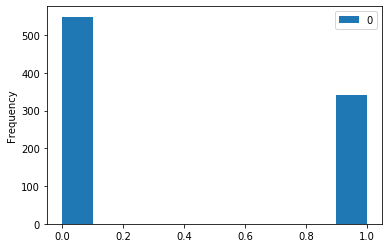

In [41]:
#Normalized graph
df_normalized_survived.plot.hist()

Text(0, 0.5, 'Frequency')

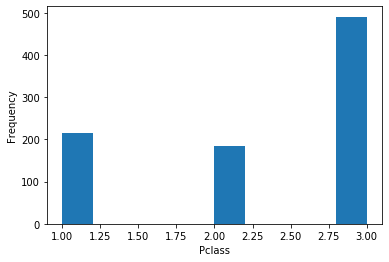

In [42]:
#Graph before Normalization (Check whether the data is normal)
df['Pclass'].plot.hist()
plt.xlabel('Pclass')
plt.ylabel("Frequency")

In [43]:
#normalization
# Create x_Pclass, where x_Pclass the 'scores' column's values as floats
x_Pclass = df[['Pclass']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler_Pclass = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled_Pclass = min_max_scaler_Pclass.fit_transform(x_Pclass)

# Run the normalizer on the dataframe
df_normalized_Pclass = pd.DataFrame(x_scaled_Pclass)

In [44]:
df_normalized_Pclass

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
886,0.5
887,0.0
888,1.0
889,0.0


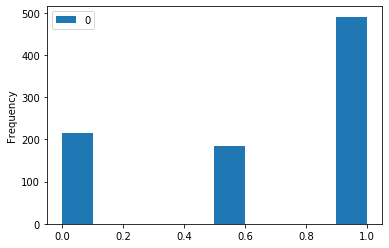

In [45]:
#Normalized graph
df_normalized_Pclass.plot.hist()

Text(0, 0.5, 'Frequency')

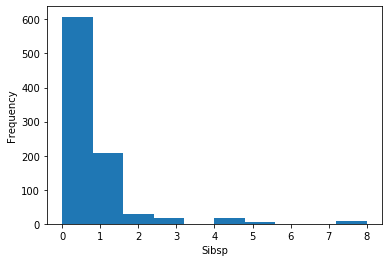

In [46]:
#Graph before Normalization (Check whether the data is normal)
df['SibSp'].plot.hist()
plt.xlabel('Sibsp')
plt.ylabel("Frequency")

In [47]:
#normalization
# Create x_sibsp, where x_sibsp the 'scores' column's values as floats
x_sibsp = df[['SibSp']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler_sibsp = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled_sibsp = min_max_scaler_sibsp.fit_transform(x_sibsp)

# Run the normalizer on the dataframe
df_normalized_sibsp = pd.DataFrame(x_scaled_sibsp)

In [48]:
df_normalized_sibsp

,0
0,0.125
1,0.125
2,0.000
3,0.125
4,0.000
...,...
886,0.000
887,0.000
888,0.125
889,0.000


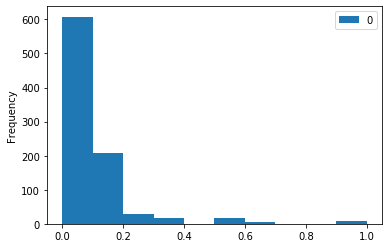

In [49]:
#Normalized graph
df_normalized_sibsp.plot.hist()

Text(0, 0.5, 'Frequency')

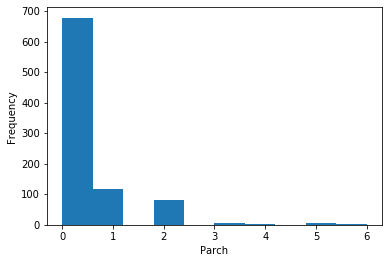

In [50]:
#Graph before Normalization (Check whether the data is normal)
df['Parch'].plot.hist()
plt.xlabel('Parch')
plt.ylabel("Frequency")

In [51]:
#normalization
# Create x_parch, where x_parch the 'scores' column's values as floats
x_parch = df[['Parch']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler_parch = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled_parch = min_max_scaler_parch.fit_transform(x_parch)

# Run the normalizer on the dataframe
df_normalized_parch = pd.DataFrame(x_scaled_parch)

In [52]:
df_normalized_parch

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
886,0.000000
887,0.000000
888,0.333333
889,0.000000


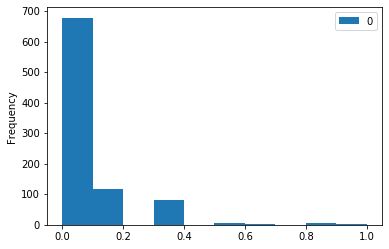

In [53]:
#Normalized graph
df_normalized_parch.plot.hist()

In [54]:
print('data:',df.shape)

data: (891, 10)


In [55]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,44.5,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


The two main variables we are concenred with are "Survived", "Pclass". "Survived" is a binary variable that refers to whether that person survivied "Pclass": is a categorical variable that refers to the class of the person in the ship (first, second, or third) It seems safe to assume that rich people were on the first class while poor were on the third but let's check that using the "Fare" variable which refers to how much people paid.

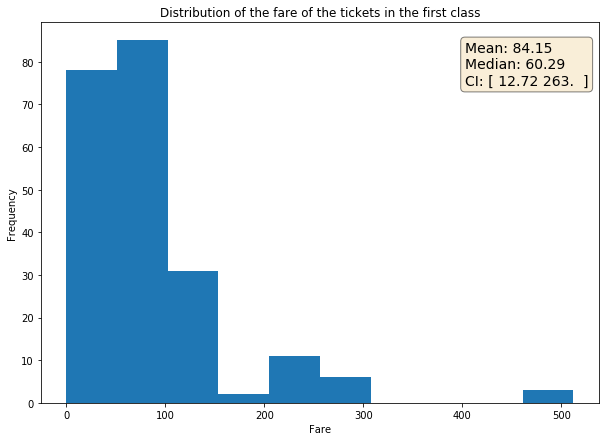

In [56]:
# make histograms of fares over the two classes

first_fares = df["Fare"][df["Pclass"]==1]
first_mean = round(np.mean(first_fares), 2)
first_median = round(np.median(first_fares), 2)
first_conf = np.round(np.percentile(first_fares, [2.5, 97.5]), 2)

fig, ax = plt.subplots(figsize = (10, 7))

ax.hist(first_fares)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(0.76, 0.95, f"Mean: {first_mean} \nMedian: {first_median} \nCI: {first_conf}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of the fare of the tickets in the first class")
plt.show()

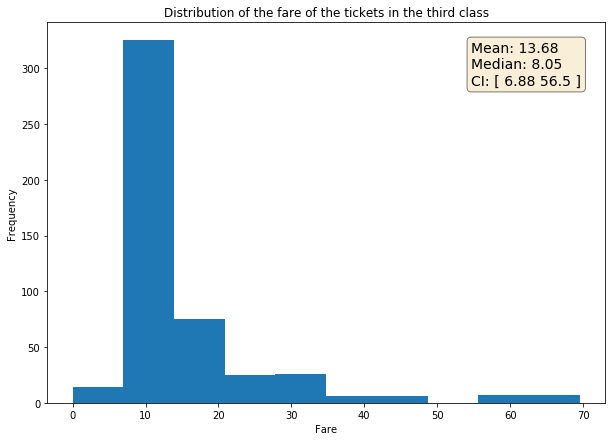

In [57]:
third_fares = df["Fare"][df["Pclass"]==3]
third_mean = round(np.mean(third_fares), 2)
third_median = round(np.median(third_fares), 2)
third_conf = np.round(np.percentile(third_fares, [2.5, 97.5]), 2)

fig, ax = plt.subplots(figsize = (10, 7))

ax.hist(third_fares)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(0.76, 0.95, f"Mean: {third_mean} \nMedian: {third_median} \nCI: {third_conf}", transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of the fare of the tickets in the third class")
plt.show()

Our assumption seems fair. First class had rich people who paid more and third class had people who paid less.

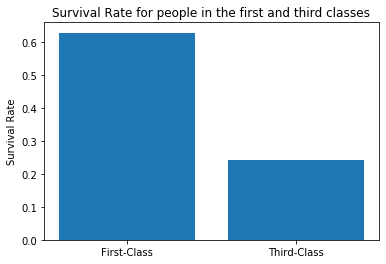

In [58]:
# Compare the survival rate of the two populations

x = ["First-Class", "Third-Class"]
y = [np.mean(df["Survived"][df["Pclass"]==1]), np.mean(df["Survived"][df["Pclass"]==3])]
plt.bar(x, y)
plt.ylabel("Survival Rate")
plt.title("Survival Rate for people in the first and third classes")
plt.show()

To make sure the two sample population distributions are normally distributed, let's use the central limit theorem and get a large enough sample to use the Z-test¶

In [59]:
# get samples using Central Limit Theorem
First_Class_Sample = np.array([np.mean(df[df["Pclass"]==1].sample(20)["Survived"].values) for i in range(100)])
third_Class_Sample = np.array([np.mean(df[df["Pclass"]==3].sample(20)["Survived"].values) for i in range(100)])

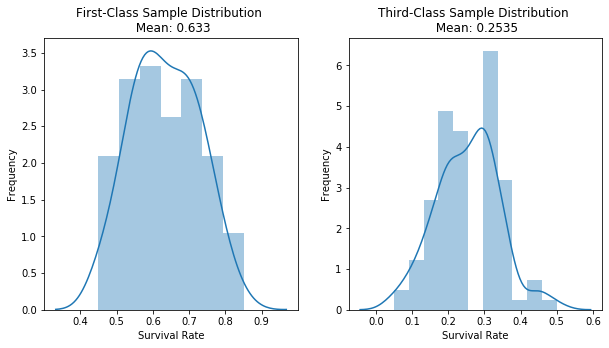

In [60]:
# make plots to check if the distributions are normal.

plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(First_Class_Sample)

plt.title(f"First-Class Sample Distribution \n Mean: {np.mean(First_Class_Sample)}")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")




plt.subplot(1, 2, 2)
sns.distplot(third_Class_Sample)
plt.title(f"Third-Class Sample Distribution \n Mean: {np.mean(third_Class_Sample)}")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")


plt.show()

Finally, calculate the Z-score and the P-value while assuming a significance level of 0.05.¶

In [61]:
# calculate the z-score and the p-value

effect = np.mean(First_Class_Sample) - np.mean(third_Class_Sample)
sigma_first = np.std(First_Class_Sample)
sigma_third = np.std(third_Class_Sample)
sigma_difference = np.sqrt((sigma_first**2)/len(First_Class_Sample)  +  (sigma_third**2)/len(third_Class_Sample))
z_score = effect / sigma_difference

In [62]:
# P-value for two-tailed test
st.norm.sf(abs(z_score))*2

7.279786650231129e-197

The P-value is very low and it's safe to reject the null hypothesis.

Conclusion The conclusion is that the provided sample proves a significant correlation between the socioeconomic class and the survival rate. Note that we still can’t establish causation between these two features as we discussed above but we can just make a generalized induction that richer people had a better chance of survival at the ship.

In [63]:
pearson_correlation=df.corr(method='pearson')
print(pearson_correlation)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.062164 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.304934  0.083081  0.018443 -0.549500
Age      -0.062164 -0.304934  1.000000 -0.213410 -0.170013  0.087119
SibSp    -0.035322  0.083081 -0.213410  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.170013  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.087119  0.159651  0.216225  1.000000


In [64]:
spearman_correlation=df.corr(method='spearman')
print(spearman_correlation)
kendall_correlation=df.corr(method='kendall')
print(kendall_correlation)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.339668 -0.041969  0.088879  0.138266  0.323736
Pclass   -0.339668  1.000000 -0.281759 -0.043019 -0.022801 -0.688032
Age      -0.041969 -0.281759  1.000000 -0.145764 -0.217941  0.088005
SibSp     0.088879 -0.043019 -0.145764  1.000000  0.450014  0.447113
Parch     0.138266 -0.022801 -0.217941  0.450014  1.000000  0.410074
Fare      0.323736 -0.688032  0.088005  0.447113  0.410074  1.000000
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.323533 -0.034566  0.085915  0.133933  0.266229
Pclass   -0.323533  1.000000 -0.221842 -0.039552 -0.021019 -0.573531
Age      -0.034566 -0.221842  1.000000 -0.114675 -0.172295  0.060277
SibSp     0.085915 -0.039552 -0.114675  1.000000  0.425241  0.358262
Parch     0.133933 -0.021019 -0.172295  0.425241  1.000000  0.330360
Fare      0.266229 -0.573531  0.060277  0.358262  0.330360  1.000000


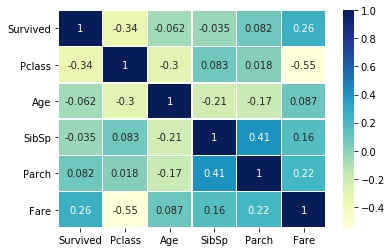

In [65]:
sns.heatmap(pearson_correlation,
              xticklabels=pearson_correlation.columns,
              yticklabels=pearson_correlation.columns,
              cmap='YlGnBu',
              annot=True,
              linewidth=0.5)

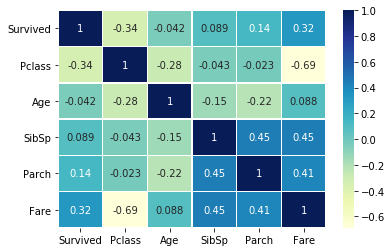

In [66]:
sns.heatmap(spearman_correlation,
              xticklabels=pearson_correlation.columns,
              yticklabels=pearson_correlation.columns,
              cmap='YlGnBu',
              annot=True,
              linewidth=0.5)

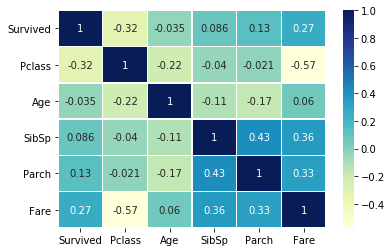

In [67]:
sns.heatmap(kendall_correlation,
              xticklabels=pearson_correlation.columns,
              yticklabels=pearson_correlation.columns,
              cmap='YlGnBu',
              annot=True,
              linewidth=0.5)